In [1]:
import os
import cv2
import numpy as np

imsize = 71

path = '/home/nadya/Work_space/6sem/ML/plants'

labels = {'Charlock': 0,
          'Common Chickweed': 1,
          'Common wheat': 2,
          'Maize': 3,
          'Scentless Mayweed': 4,
          'Small-flowered Cranesbill': 5,
          'Sugar beet': 6}

num_classes = len(labels)
'''
labels = {'Charlock': 0,
          'Common Chickweed': 1,
          'Common wheat': 2,
          'Maize': 3,
          'Scentless Mayweed': 4,
          'Small-flowered Cranesbill': 5,
          'Sugar beet': 6,
          'Black-grass': 7,
          'Cleavers': 8}
ks
num_classes = len(labels)
'''


def load_data(path, folders):
    setsize = sum(len(os.listdir('{}/{}'.format(path, folder))) for folder in folders)
    images = np.zeros((setsize, imsize, imsize, 3), dtype=np.uint8)
    labels = np.zeros(setsize, dtype=np.int8)
    
    i = 0
    for folder in folders:
        for image_name in os.listdir('{}/{}'.format(path, folder)):
            image = cv2.imread('{}/{}/{}'.format(path, folder, image_name))
            images[i] = cv2.resize(image, (imsize, imsize))
            labels[i] = folders[folder]
            i += 1
    
    return images, labels

In [2]:
images, labels = load_data(path, labels)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import keras
from keras.models import Model, Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=123)

In [7]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test  = np_utils.to_categorical(y_test, num_classes)

In [17]:
Y_test[:10]

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [18]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
batch_size = 8
epochs = 20
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2490 samples, validate on 831 samples
Epoch 1/20
2490/2490 [==============================] - 35s 14ms/step - loss: 2.9822 - acc: 0.2056 - val_loss: 1.7232 - val_acc: 0.2635
Epoch 2/20
2490/2490 [==============================] - 26s 10ms/step - loss: 1.5077 - acc: 0.4213 - val_loss: 1.2126 - val_acc: 0.5427
Epoch 3/20
2490/2490 [==============================] - 25s 10ms/step - loss: 1.2536 - acc: 0.5181 - val_loss: 1.0882 - val_acc: 0.5933
Epoch 4/20
2490/2490 [==============================] - 31s 12ms/step - loss: 1.1138 - acc: 0.5936 - val_loss: 1.5182 - val_acc: 0.3875
Epoch 5/20
2490/2490 [==============================] - 27s 11ms/step - loss: 1.0469 - acc: 0.6048 - val_loss: 0.9064 - val_acc: 0.6775
Epoch 6/20
2490/2490 [==============================] - 30s 12ms/step - loss: 0.9839 - acc: 0.6426 - val_loss: 0.8769 - val_acc: 0.7076
Epoch 7/20
2490/2490 [==============================] - 27s 11ms/step - loss: 0.9189 - ac

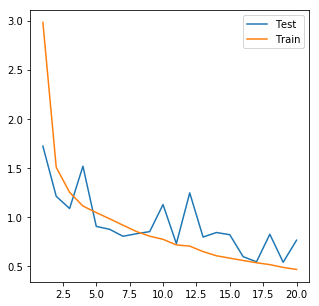

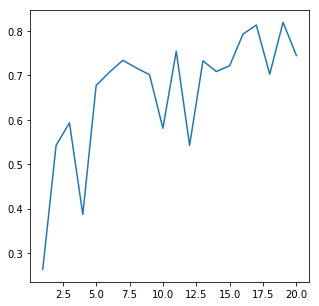

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_loss'], label='Test')
plt.title('val loss')
plt.plot(range(1, epochs + 1), h.history['loss'], label='Train')
plt.legend()
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_acc'], label='Test')
plt.title('val accuracy')

In [22]:
print(X_train.shape, X_test.shape)

(2490, 71, 71, 3) (831, 71, 71, 3)


In [23]:
from sklearn.metrics import classification_report

labels_pred = [np.argmax(pred) for pred in model.predict(X_test)]
labels_fact = [np.argmax(fact) for fact in Y_test]

print(classification_report(labels_fact, labels_pred))

              precision    recall  f1-score   support

           0       0.59      0.97      0.74       106
           1       0.99      0.51      0.67       177
           2       0.83      0.95      0.89        79
           3       0.71      0.90      0.79        61
           4       0.74      0.66      0.70       161
           5       0.87      0.74      0.80       127
           6       0.66      0.80      0.72       120

   micro avg       0.74      0.74      0.74       831
   macro avg       0.77      0.79      0.76       831
weighted avg       0.79      0.74      0.74       831



In [24]:
import h5py

model_json = model.to_json()
with open(path + '/' + "model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(path + '/' + "model.h5")
print("Saved model to disk")

Saved model to disk


### Стартовая модель

In [9]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 8
epochs = 20
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2490 samples, validate on 831 samples
Epoch 1/20
2490/2490 [==============================] - 9s 4ms/step - loss: 13.2231 - acc: 0.1791 - val_loss: 12.9759 - val_acc: 0.1949
Epoch 2/20
2490/2490 [==============================] - 8s 3ms/step - loss: 13.2376 - acc: 0.1787 - val_loss: 12.9759 - val_acc: 0.1949
Epoch 3/20
2490/2490 [==============================] - 7s 3ms/step - loss: 13.2376 - acc: 0.1787 - val_loss: 12.9759 - val_acc: 0.1949
Epoch 4/20
2490/2490 [==============================] - 7s 3ms/step - loss: 13.2376 - acc: 0.1787 - val_loss: 12.9759 - val_acc: 0.1949
Epoch 5/20
2490/2490 [==============================] - 7s 3ms/step - loss: 13.2376 - acc: 0.1787 - val_loss: 12.9759 - val_acc: 0.1949
Epoch 6/20
2490/2490 [==============================] - 8s 3ms/step - loss: 13.2376 - acc: 0.1787 - val_loss: 12.9759 - val_acc: 0.1949
Epoch 7/20
2490/2

Text(0.5, 1.0, 'val accuracy')

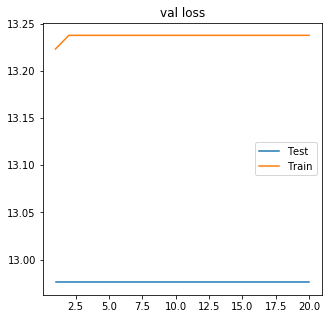

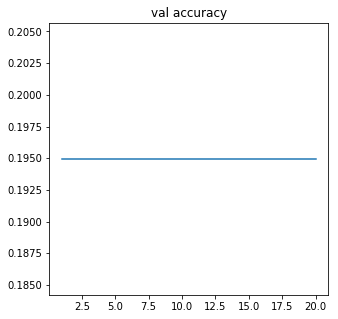

In [10]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_loss'], label='Test')
plt.title('val loss')
plt.plot(range(1, epochs + 1), h.history['loss'], label='Train')
plt.legend()
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_acc'], label='Test')
plt.title('val accuracy')

### Усложнение архитектуры: увеличение количества слоев.

In [12]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 8
epochs = 10
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

Train on 2490 samples, validate on 831 samples
Epoch 1/10
2490/2490 [==============================] - 62s 25ms/step - loss: 3.3170 - acc: 0.2293 - val_loss: 1.9232 - val_acc: 0.2178
Epoch 2/10
2490/2490 [==============================] - 63s 25ms/step - loss: 1.8278 - acc: 0.3072 - val_loss: 1.7899 - val_acc: 0.4416
Epoch 3/10
2490/2490 [==============================] - 64s 26ms/step - loss: 1.2858 - acc: 0.5076 - val_loss: 1.4073 - val_acc: 0.4838
Epoch 4/10
2490/2490 [==============================] - 61s 24ms/step - loss: 1.1578 - acc: 0.5743 - val_loss: 1.5824 - val_acc: 0.4826
Epoch 5/10
2490/2490 [==============================] - 61s 24ms/step - loss: 0.9574 - acc: 0.6904 - val_loss: 1.5375 - val_acc: 0.5030
Epoch 6/10
2490/2490 [==============================] - 76s 30ms/step - loss: 0.7647 - acc: 0.7695 - val_loss: 1.9005 - val_acc: 0.5824
Epoch 7/10
2490/2490 [==============================] - 75s 30ms/step - loss: 0.6046 - acc: 0.8225 - val_loss: 1.8375 - val_acc: 0.5921
E

Text(0.5, 1.0, 'val accuracy')

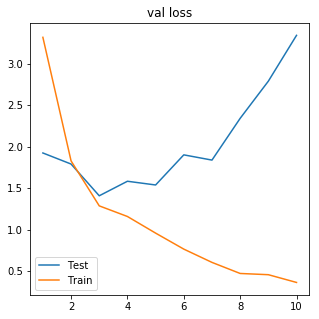

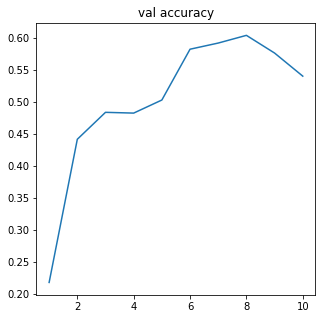

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_loss'], label='Test')
plt.title('val loss')
plt.plot(range(1, epochs + 1), h.history['loss'], label='Train')
plt.legend()
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_acc'], label='Test')
plt.title('val accuracy')

In [14]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 8
epochs = 10
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 2490 samples, validate on 831 samples
Epoch 1/10
2490/2490 [==============================] - 77s 31ms/step - loss: 13.2819 - acc: 0.1759 - val_loss: 13.4608 - val_acc: 0.1649
Epoch 2/10
2490/2490 [==============================] - 80s 32ms/step - loss: 13.2764 - acc: 0.1763 - val_loss: 13.4608 - val_acc: 0.1649
Epoch 3/10
2490/2490 [==============================] - 75s 30ms/step - loss: 13.2764 - acc: 0.1763 - val_loss: 13.4608 - val_acc: 0.1649
Epoch 4/10
2490/2490 [==============================] - 75s 30ms/step - loss: 13.2764 - acc: 0.1763 - val_loss: 13.4608 - val_acc: 0.1649
Epoch 5/10
2490/2490 [==============================] - 72s 29ms/step - loss: 13.2764 - acc: 0.1763 - val_loss: 13.4608 - val_acc: 0.1649
Epoch 6/10
2490/2490 [==============================] - 79s 32ms/step - loss: 13.2764 - acc: 0.1763 - val_loss: 13.4608 - val_acc: 0.1649
Epoch 7/10

Text(0.5, 1.0, 'val accuracy')

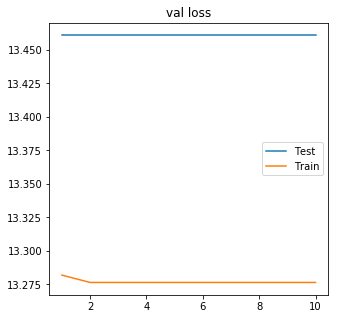

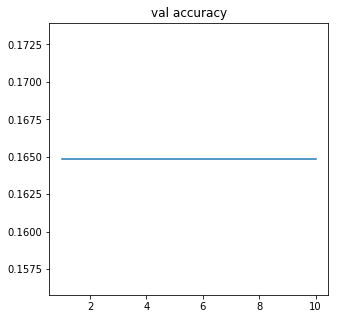

In [15]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_loss'], label='Test')
plt.title('val loss')
plt.plot(range(1, epochs + 1), h.history['loss'], label='Train')
plt.legend()
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_acc'], label='Test')
plt.title('val accuracy')

In [ ]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 8
epochs = 10
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

In [19]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 8
epochs = 10
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

Train on 2490 samples, validate on 831 samples
Epoch 1/10
2490/2490 [==============================] - 27s 11ms/step - loss: 2.0570 - acc: 0.2193 - val_loss: 1.8707 - val_acc: 0.2298
Epoch 2/10
2490/2490 [==============================] - 26s 10ms/step - loss: 1.8190 - acc: 0.2643 - val_loss: 1.7921 - val_acc: 0.3045
Epoch 3/10
2490/2490 [==============================] - 25s 10ms/step - loss: 1.6128 - acc: 0.3763 - val_loss: 1.4861 - val_acc: 0.4452
Epoch 4/10
2490/2490 [==============================] - 26s 10ms/step - loss: 1.3568 - acc: 0.4763 - val_loss: 1.2617 - val_acc: 0.5295
Epoch 5/10
2490/2490 [==============================] - 25s 10ms/step - loss: 1.1937 - acc: 0.5510 - val_loss: 1.3360 - val_acc: 0.5102
Epoch 6/10
2490/2490 [==============================] - 25s 10ms/step - loss: 1.0975 - acc: 0.6000 - val_loss: 1.0999 - val_acc: 0.5933
Epoch 7/10
2490/2490 [==============================] - 25s 10ms/step - loss: 1.0122 - acc: 0.6378 - val_loss: 1.1740 - val_acc: 0.5523
E

Text(0.5, 1.0, 'val accuracy')

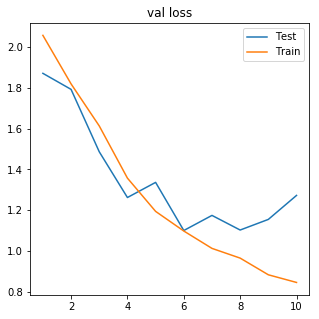

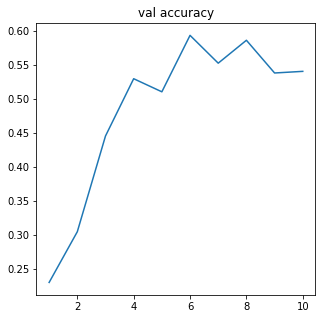

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_loss'], label='Test')
plt.title('val loss')
plt.plot(range(1, epochs + 1), h.history['loss'], label='Train')
plt.legend()
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_acc'], label='Test')
plt.title('val accuracy')


In [9]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', input_shape=(imsize, imsize, 3)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 8
epochs = 30
h = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

Train on 2490 samples, validate on 831 samples
Epoch 1/30
2490/2490 [==============================] - 27s 11ms/step - loss: 0.6950 - acc: 0.7554 - val_loss: 0.6678 - val_acc: 0.7822
Epoch 2/30
2490/2490 [==============================] - 24s 10ms/step - loss: 0.5881 - acc: 0.8000 - val_loss: 0.6119 - val_acc: 0.8026
Epoch 3/30
2490/2490 [==============================] - 25s 10ms/step - loss: 0.5575 - acc: 0.8060 - val_loss: 0.4834 - val_acc: 0.8448loss: 0.5590 - acc: 0. - ETA: 0s - loss: 0.5607 - a
Epoch 4/30
2490/2490 [==============================] - 24s 10ms/step - loss: 0.5099 - acc: 0.8265 - val_loss: 0.6004 - val_acc: 0.8002
Epoch 5/30
2490/2490 [==============================] - 24s 10ms/step - loss: 0.4910 - acc: 0.8357 - val_loss: 0.4775 - val_acc: 0.8291
Epoch 6/30
2490/2490 [==============================] - 26s 11ms/step - loss: 0.4686 - acc: 0.8402 - val_loss: 0.6326 - val_acc: 0.7978
Epoch 7/30
2490/2490 [==============================] - 26s 10ms/step - loss: 0.4191 -

Text(0.5, 1.0, 'val accuracy')

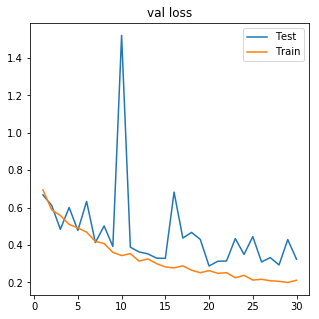

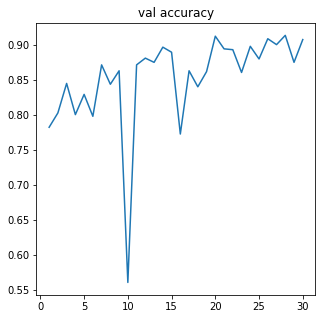

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_loss'], label='Test')
plt.title('val loss')
plt.plot(range(1, epochs + 1), h.history['loss'], label='Train')
plt.legend()
plt.figure(figsize=(5, 5))
plt.plot(range(1, epochs + 1), h.history['val_acc'], label='Test')
plt.title('val accuracy')